# Исследование продаж в интернет-магазине компьютерных игр

В качестве входных данных для исследования поступила таблица с информацией о продаже компьютерных игр интернет-магазином «Стримчик» за 2016 год. В таблице представлены данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation). 

Цель исследования: выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**План исследования:**
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ данных.
 4. Описание портрета пользователей из разных регионов.
 5. Проверка гипотез.
 6. Итоговый вывод


In [1]:
# импортируем необходимые для анализа библиотеки перед началом исследования

import pandas as pd # импортируем библиотеку pandas 
import matplotlib.pyplot as plt #импортируем библиотеку matplotlib 
import numpy as np #импортируем библиотеку numpy 
from scipy import stats as st #импортируем модуль stats из библиотеки scipy

# 1. Загрузка данных

In [2]:
df = pd.read_csv('games.csv') # прочитаем файл с данными

In [3]:
df.head() # выведем первые несколько строк таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info() # вызовем метод info, чтобы ознакомиться с основными параметрами таблицы и типами данных в ней

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# 2. Предобработка данных


Вызов метода **info** показал, что названия столбцов не соответствуют правилам хорошего стиля, в таблице есть пропущенные значения, а колонкам **User_Score** и **Year_of_Release** соответствует некорректный тип данных. Разберемся с этими и другими проблемами в данных на этом шаге.

#### 2.1 Изменение наименования столбцов

Первым делом изменим названия столбцов в таблице так, чтобы они соответствовали правилам хорошего стиля, то есть приведем регистр названия столбцов к нижнему:

In [5]:
df.rename(columns=str.lower, inplace=True)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### 2.2 Обработка пропущенных значений

Прежде, чем выполнять дальнейшие манипуляции с данными, проверим их на наличие пропущенных значений:

In [6]:
df.isna().sum() # выведем количество пропущенных значений в каждой колонке

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски наблюдаются в столбцах с названием, с годом выпуска, жанром игры, а также в столбцах с рейтингами критиков, пользовательским и возрастным рейтингами. Пропусков довольно большое количество, например, в столбце с рейтингом от критиков их больше половины от общего числа. 

Удалить такое большое количество строк мы точно не можем. Подумаем, есть ли какие-то способы заполнить эти ячейки.

Первое, что приходит в голову, попытаться заполнить пустые ячейки в столбце с возрастным рейтингом, ведь у него наверняка есть связь с жанром. Попробуем:

In [7]:
df[['genre', 'rating']].value_counts().reset_index().sort_values(by='genre') # посчитаем сколько строк в таблице
# соответствуют тому или иному рейтингу внутри разных жанров, отсортируем выборку в алфавитном порядке по жанрам

,genre,rating,count
54,Action,AO,1
1,Action,T,681
2,Action,M,608
53,Action,EC,1
5,Action,E10+,481
8,Action,E,416
26,Adventure,M,99
23,Adventure,T,115
21,Adventure,E,162
31,Adventure,E10+,68


Как видно, четкой связи между жанром и рейтингом все же не наблюдается. Внутри каждого жанра всегда есть минимум 4 разных рейтинга, однозначно лидирующего среди них обычно нет.

Однако, стоит учесть, что рейтинг ESRB был разработан специально для США и Канады. В связи с этим, он может отсутствовать для игр вне этих стран.  Сохраним информацию об этом, заполнив пропущенные значения строкой "no rating".

In [8]:
df['rating'] = df['rating'].fillna('no rating')

Что касается остальных пропусков, данные об имени, жанре и годе выпуска нельзя усреднить или заполнить рандомными значениями - это просто не имеет смысла. То же самое можно сказать про возрастной рейтинг. Заполнение пропусков в столбцах с пользовательским рейтингом и рейтингом от критиков грозит искажением результатов исследования. 

Возможными причинами пропусков может быть отсутствие соответствующих данных как таковых. Например, рейтинг критиков существует не для всех игр, так как не все игры обозреваются. Рейтинга от пользователя также может не быть, если игра не пользуется достаточной для формирования рейтинга популярностью. Год выпуска также может быть не всегда известен интернет-магазину.

Таким образом, на данном этапе решено все пропущенные значения в датафрейме, кроме рейтинга ESRB, оставить без изменения.

#### 2.3 Обработка дубликатов

Проверим датафрейм на наличие явных дубликатов:

In [9]:
df.duplicated().sum()

0

Наличие неявных дубликатов возможно в столбцах с именем и жанром игры, а также в столбце с названием платформы. Посмотрим на уникальные значения в этих столбцах.

In [10]:
df['name'].unique() # выведем уникальные значения в столбце с названием игр

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [11]:
df['genre'].unique() # выведем уникальные значения в столбце с жанрами

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [12]:
df['platform'].unique() # выведем уникальные значения в столбце с названием платформ

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В столбцах с названием платформ и жанров наличие дубликатов можно оценить визуально - значений не так много, видно, что они не повторяются. Названий игр сильно больше, кроме того, они обычно состоят из нескольких слов. Выявить, какими могут быть неявные дубликаты, очень сложно. Заметно лишь то, что в названиях сочетаются нижний и верхний регистр. Приведем все значения к нижнему регистру и повторно проверим наличие явных дубликатов. 

In [13]:
df['name'] = df['name'].str.lower() # приводим значения в колонках к нижнему регистру
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum() # повторно проверяем датафрейм на 
# наличие дубликатов, беря во внимание не только имя, но и название платформы, и год выпуска

2

Посмотрим, какие именно строки дублируются:

In [14]:
df.loc[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,no rating
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,no rating
16230,madden nfl 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Первые две строчки содержат данные об играх с достаточно высоким объемом продаж. Тогда как продажи этих же двух игр в последних строчках практически нулевые. Поэтому оставим информацию из первых двух строчек, а дубликаты с нулевыми продажами удалим.

In [15]:
df = df.loc[~df.duplicated(subset=['name', 'platform', 'year_of_release'], keep='first')].copy()

#### 2.4 Изменение типов данных

Ранее мы выявили, что в столбцах с годом выпуска и пользовательским рейтингом, тип данных не соответствует сути параметра. Для записи года был выбран формат *float*, а для пользовательского рейтинга - *object*. Изменим типы данных так, чтобы с ними было удобно работать в дальнейшем. 

Тип данных в столбце с годом выпуска игры сделаем целым числом:

In [16]:
df['year_of_release']=df['year_of_release'].astype('Int16') # меняем тип данных, игнорируя значения NaN

Тип данных в столбце **user_score** приведем к числу с плавающей точкой, чтобы в дальнейшем пользовательский рейтинг можно было фильтровать и сравнивать с другими числовыми значениями. Учтем, что в столбце есть значение *tbd*, означающее, что пользовательский рейтинг пока не определен:

In [17]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') # изменяем тип данных, игнорируя tbd и NaN
df # выводим таблицу, дополненную новым столбцом

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating


Сделаем итоговую проверку:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int16  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int16(1), float64(6), object(4)
memory usage: 1.5+ MB


Для всех столбцов установлен подходящий тип данных. Преобразования проведены успешно.

#### 2.5 Создание дополнительных столбцов

Для дальнейшего анализа нам понадобится общая сумма продаж во всех регионах. Посчитаем ее и запишем в новом столбце:

In [19]:
df['sum_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no rating,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no rating,0.01


**Подведем итог проведенного анализа.**

В процессе предобработки исходных данных были выполнены следующие процедуры:
- названия столбцов приведены к хорошему стилю (к нижнему регистру);
- проведена проверка датафрейма на наличие пропущенных значений и дубликатов;
- в столбцах с годом выпуска игры и с пользовательским рейтингом изменен тип данных;
- добавлен столбец с суммарными продажами игр в разных регионах, необходимый для дальнейшего анализа.

Среди строк с дубликатами, выбрали данные с наибольшим объемом продаж. Строки с объемом продаж близким к нулю удалили. Пропущенные значения было принято решение оставить без изменений. 

# 3. Исследовательский анализ данных

#### 3.1 Количество игр, выпущенных в разные годы

Посмотрим, как много игр выпускалось в разные годы. Построим график распределения количества игр по годам. 

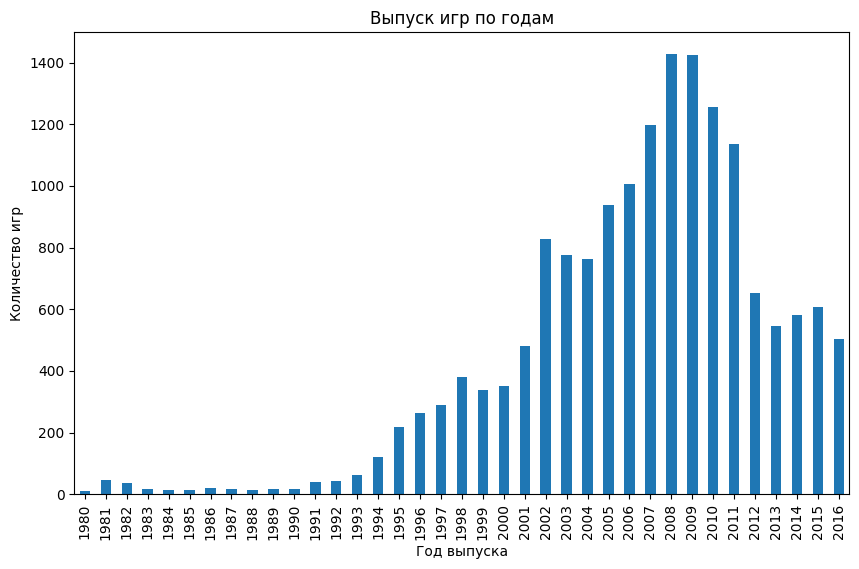

In [20]:
df.groupby('year_of_release')['na_sales'].count().plot(kind='bar', figsize=(10,6))
plt.title('Выпуск игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Судя по графику, активное развитие игровой индустрии началось где-то в 1994 году. Самый расцвет пришелся на 2008-2009 год. В то же время в интернет-магазине есть небольшая коллекция ретро-игр, выпущенных в 80-90ых годах. 

Логично предположить, что качество игр то время сильно отличалось от того, что обычно продается в 2016 году. Кроме того, наверняка у очень маленькой доли покупателей есть платформа, с помощью которой можно запустить такие игры. Поэтому, вероятность того, что они будут пользоваться успехом у кого-то кроме коллекционеров, очень мала. 

Посчитаем долю строк с играми, выпущенными до 1994 года , чтобы понять, можем ли мы исключить их из исследования, как непопулярные:

In [21]:
df.loc[df['year_of_release']<1994, 'sum_sales'].count()/len(df) # фильтруем данные по
# году выпуска, считаем количество игр, выпущенных до 1994 года и считаем долю от общего количества

0.02189912044516245

Так как доля игр , выпущенных до 1994 года невелика - примерно равна 2% , можем удалить эти строки:

In [22]:
df = df[df['year_of_release']>=1994]

#### 3.2  Анализ продаж по платформам

Оценим, как менялись продажи по плафтормам. Для этого выберем топ-10 платформ, игры для которых лучше всего продавались:

In [23]:
df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False) # посчитаем сумму продаж для каждой платформы
# и отсортируем значения по убыванию

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES      84.67
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.13
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: sum_sales, dtype: float64

In [24]:
top_platforms = df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).index[:10] # выберем топ-10

Оценим распределение продаж игр для этих платформ по годам:

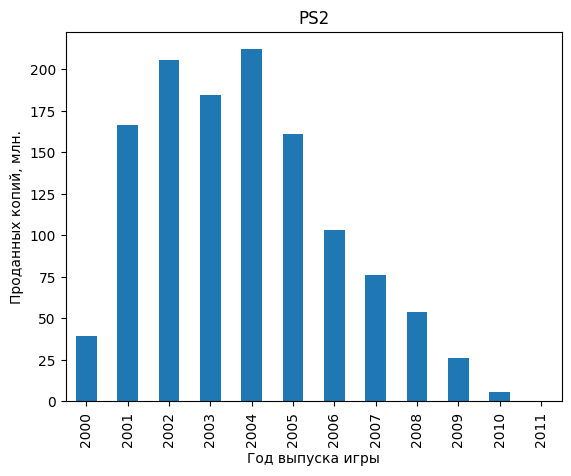

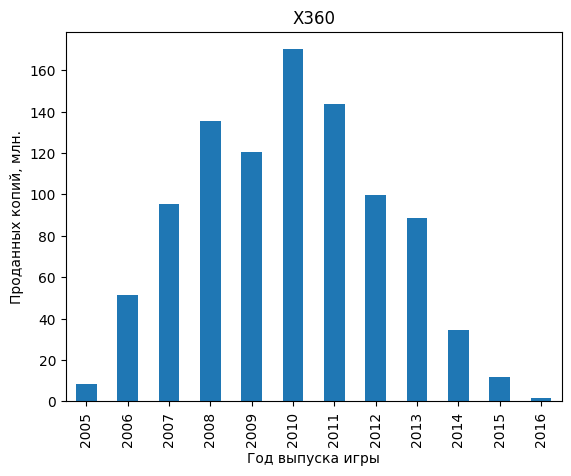

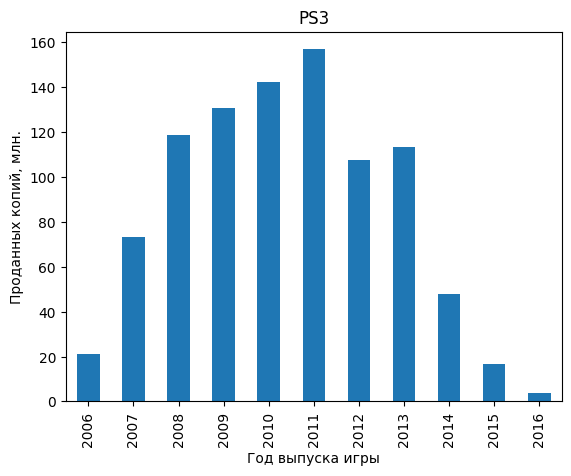

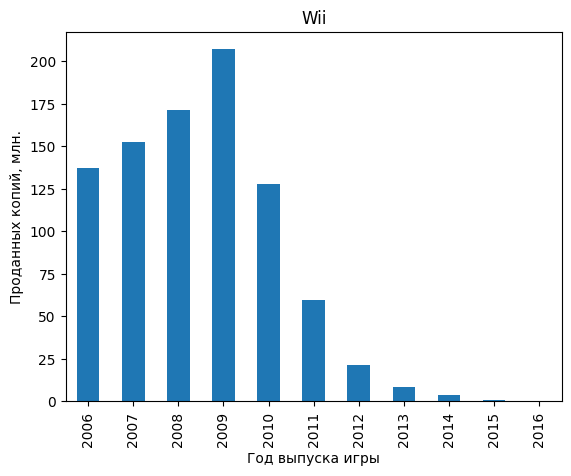

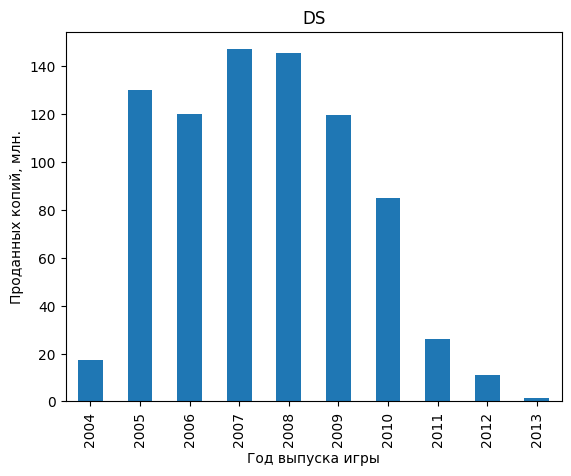

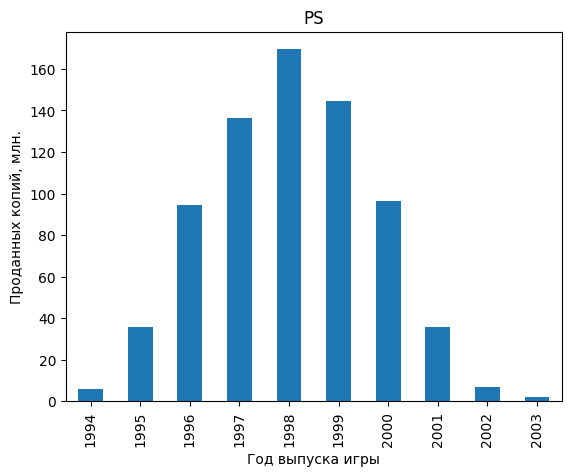

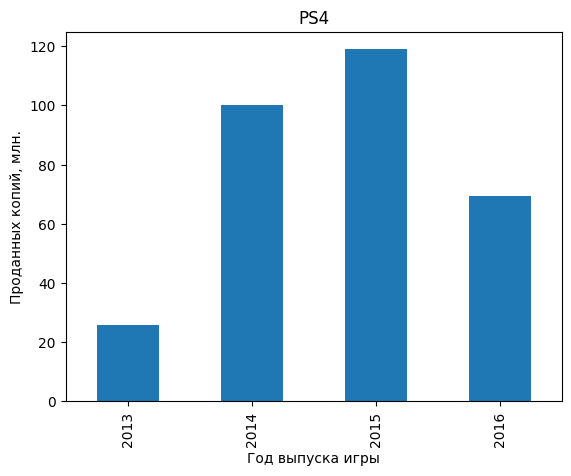

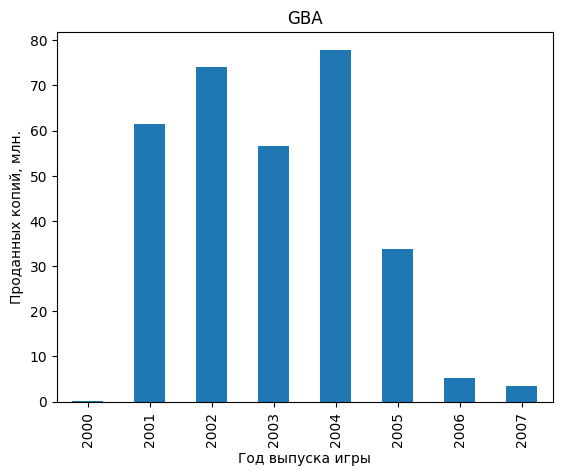

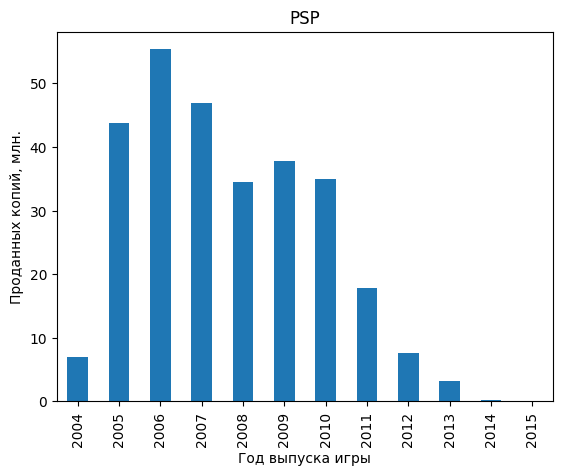

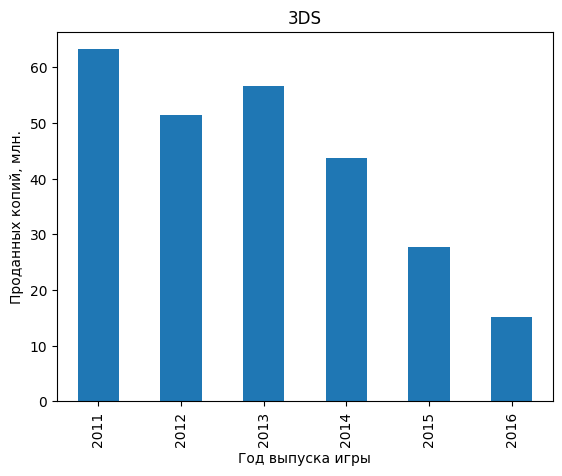

In [25]:
for platform in top_platforms:
    df.loc[df['platform']==platform].groupby('year_of_release')['sum_sales'].sum().plot(kind='bar')
    plt.title(platform)
    plt.xlabel('Год выпуска игры')
    plt.ylabel('Проданных копий, млн.')
    plt.show()

В среднем игры активно продаются лет 6-8, при этом пик продаж приходится на середину "жизни". Соответственно каждые 3-4 года меняются тренды продаж платформ - в первой половине "жизни" они растут, во второй половине - падают. Так как цель нашего исследования предсказать продажи 2017 года и сделать ставку на популярные игры, разумно анализировать только текущие актуальные тренды, которые имели место 3 последних года.

Создадим новый датафрейм с данными за 2014-2016 год:

In [26]:
recent = df[df['year_of_release']>2013] 
recent

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no rating,0.01


Посмотрим, какие платформы лидируют по продажам последнее время.

In [27]:
recent.groupby('platform')['sum_sales'].sum().sort_values(ascending=False) # посчитаем сумму продаж для каждой платформы
# и отсортируем значения по убыванию

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: sum_sales, dtype: float64

In [28]:
top_recent = recent.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).index # создаем список 
# платформ актуальных в 2014-2016 годах 

Отобразим с помощью графиков данные по продажам игр для каждой из платформ по годам.

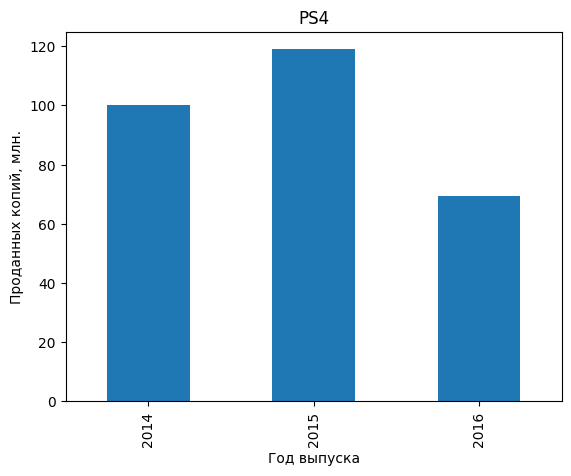

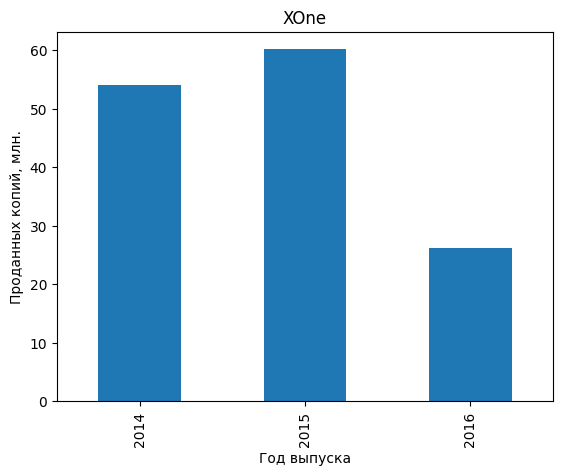

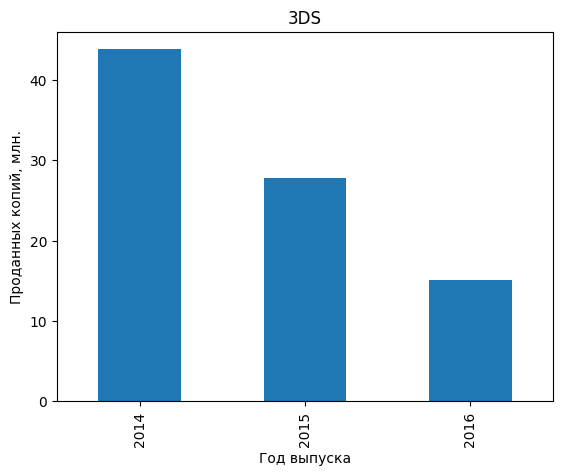

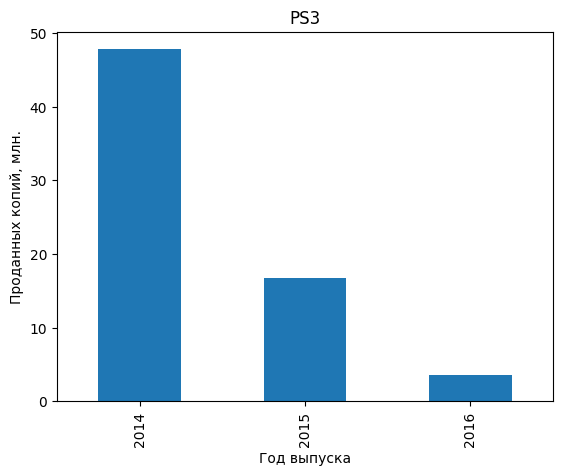

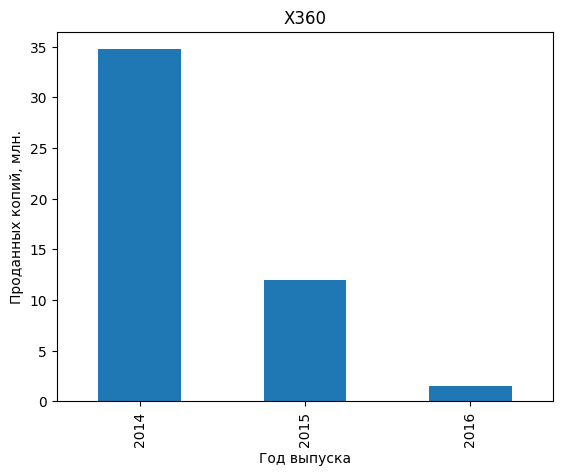

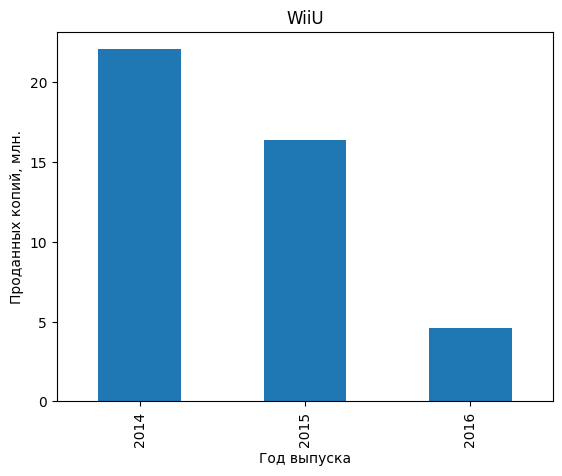

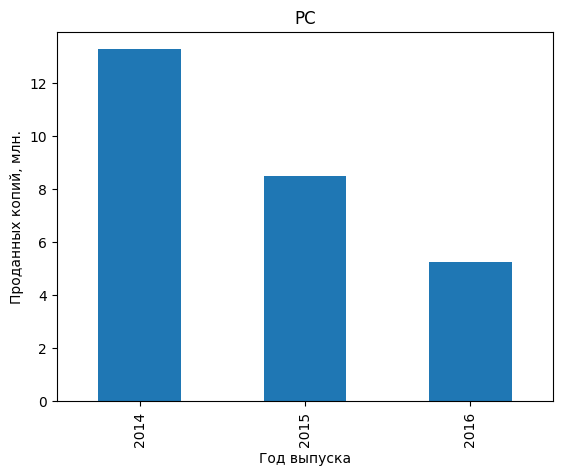

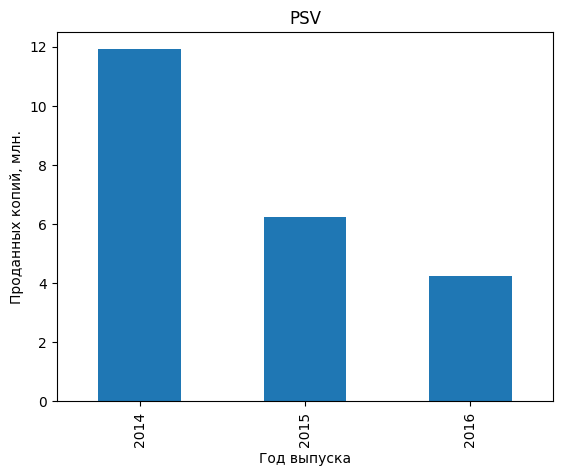

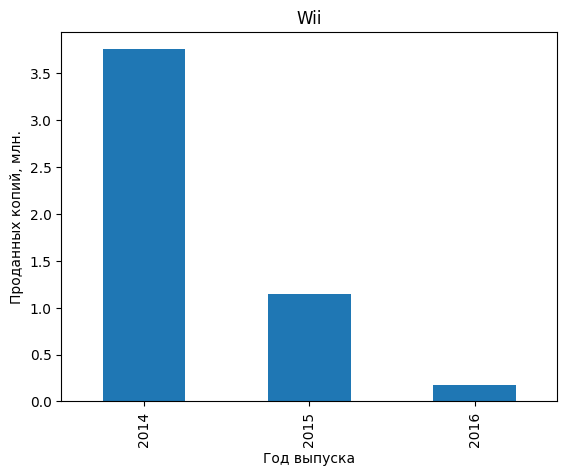

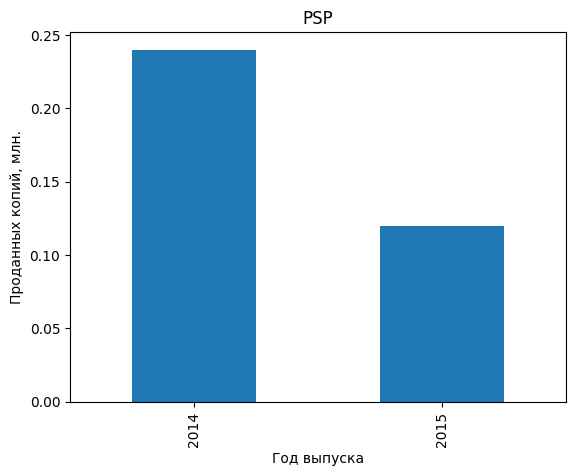

In [29]:
for platform in top_recent:
    recent.loc[recent['platform']==platform].groupby('year_of_release')['sum_sales'].sum().plot(kind='bar')
    plt.title(platform)
    plt.xlabel('Год выпуска')
    plt.ylabel('Проданных копий, млн.')
    plt.show()

Судя по графикам, в 2016 году продажи игр сразу для всех платформ сильно упали. Это маловероятно, поэтому сделаем вывод, что нам предоставлены данные не за весь 2016 год, и проигнориуем этот спад, оценивая динамику по предыдущим годам.

С 2014 по 2015 годы растут продажи игр только на платформы PS4 и XOne. Учитывая то, что это также платформы с наибольшим объемом продаж, мы можем предполагать, что в 2017 году продажи игр для этих платформ останутся на высоком уровне.

Посмотрим на распределение продаж игр по платформам.

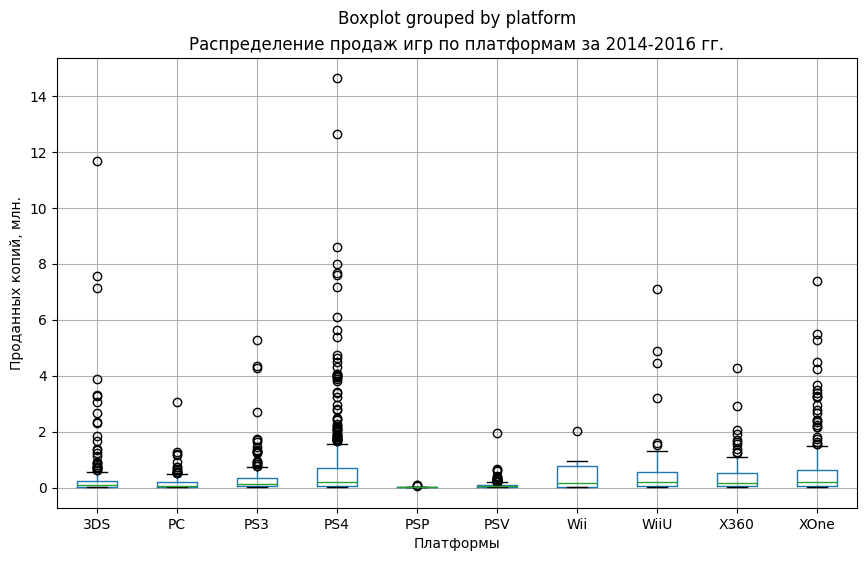

In [30]:
recent.boxplot(column='sum_sales', by='platform', figsize=(10,6))
plt.title('Распределение продаж игр по платформам за 2014-2016 гг.')
plt.xlabel('Платформы')
plt.ylabel('Проданных копий, млн.')
plt.show()

По графику видно, что каждой платформе соответствует большое количество выбросов - игр с необычно большим объемом продаж. Из-за этого сложно заметить другие особенности распределения.

Чтобы ознакомиться с ситуацией детальнее, выведем еще один график, установив верхнюю границу продаж в 2 миллиона копий.

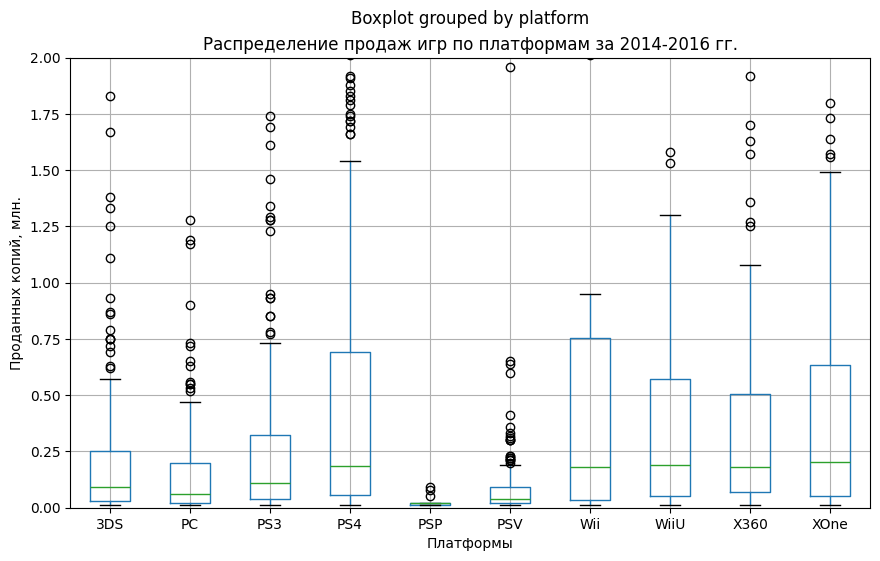

In [31]:
recent.boxplot(column='sum_sales', by='platform', figsize=(10,6))
plt.ylim([0,2])
plt.title('Распределение продаж игр по платформам за 2014-2016 гг.')
plt.xlabel('Платформы')
plt.ylabel('Проданных копий, млн.')
plt.show()

На графике без учета выбросов становится заметнее, что самые высокие средние продажи соответсвтуют играм для платформ PS4, Wii, WiiU, XOne.

Оценим влияние на продажи отзывов пользователей и критиков внутри одной популярной платформы - PS4.

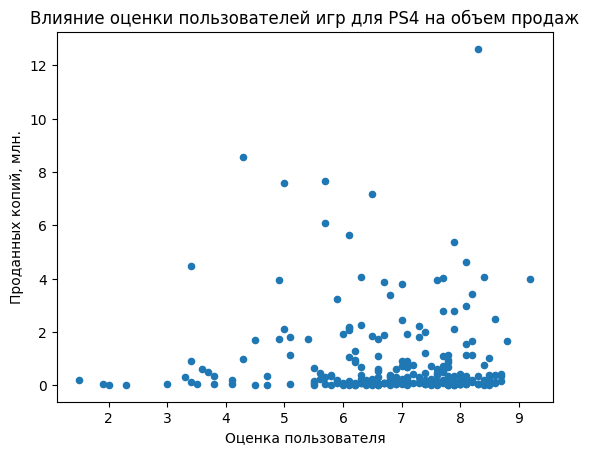

In [32]:
recent[recent['platform']=='PS4'].plot.scatter(x='user_score', y='sum_sales') # построим диаграмму рассеяния для 
# пользовательского рейтинга и суммарного объема продаж
plt.xlabel('Оценка пользователя')
plt.ylabel('Проданных копий, млн.')
plt.title('Влияние оценки пользователей игр для PS4 на объем продаж')
plt.show()

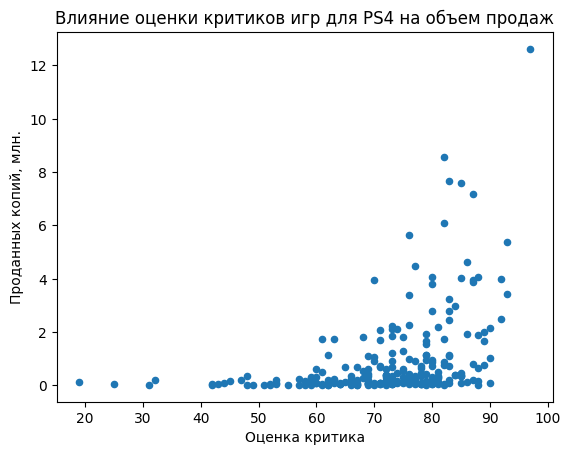

In [33]:
recent[recent['platform']=='PS4'].plot.scatter(x='critic_score', y='sum_sales') # построим диаграмму рассеяния для 
# рейтинга критиков и суммарного объема продаж
plt.xlabel('Оценка критика')
plt.ylabel('Проданных копий, млн.')
plt.title('Влияние оценки критиков игр для PS4 на объем продаж')
plt.show()

По диаграммам однозначный вывод взаимосвязях сделать трудно. Посчитаем соответствующие коэффциенты корреляции.

In [34]:
recent.loc[recent['platform']=='PS4', ['user_score', 'critic_score', 'sum_sales']].corr()

,user_score,critic_score,sum_sales
user_score,1.000000,0.546434,-0.040132
critic_score,0.546434,1.000000,0.402661
sum_sales,-0.040132,0.402661,1.000000


Наблюдается положительная корреляция 0.4 между рейтингом от критиков и продажами. Между пользовательским рейтингом и суммарными продажами зависимость почти отсутствует. 

Определим как это соотносится с корреляцией указанных величин для других платформ, и построим для них графики рассеяния. 

		 PS4


,user_score,critic_score,sum_sales
user_score,1.000000,0.546434,-0.040132
critic_score,0.546434,1.000000,0.402661
sum_sales,-0.040132,0.402661,1.000000


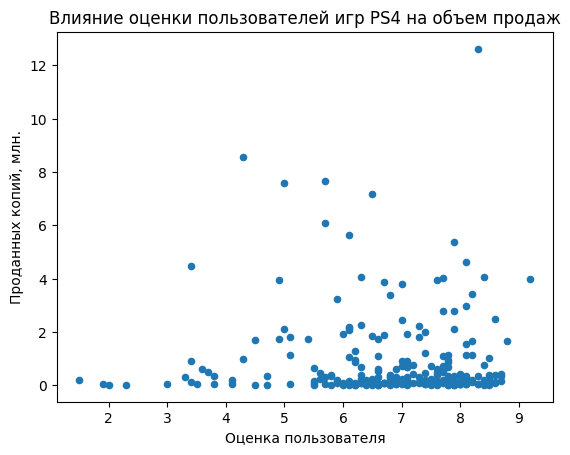

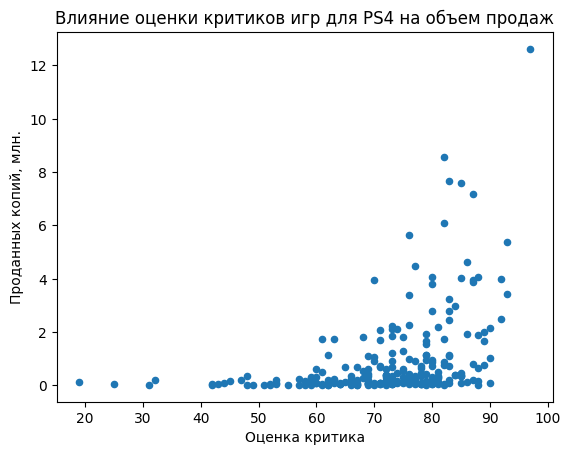

		 XOne


,user_score,critic_score,sum_sales
user_score,1.000000,0.440977,-0.070384
critic_score,0.440977,1.000000,0.428677
sum_sales,-0.070384,0.428677,1.000000


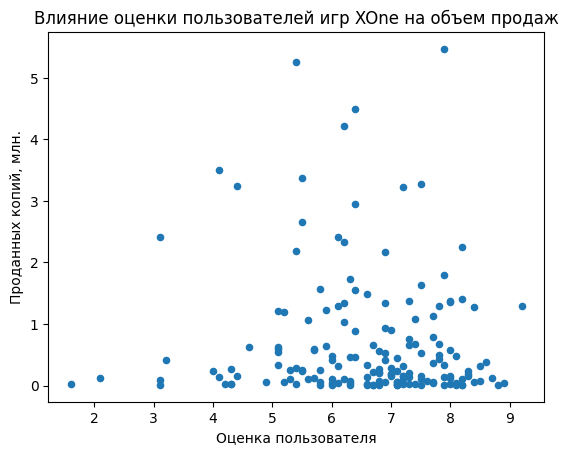

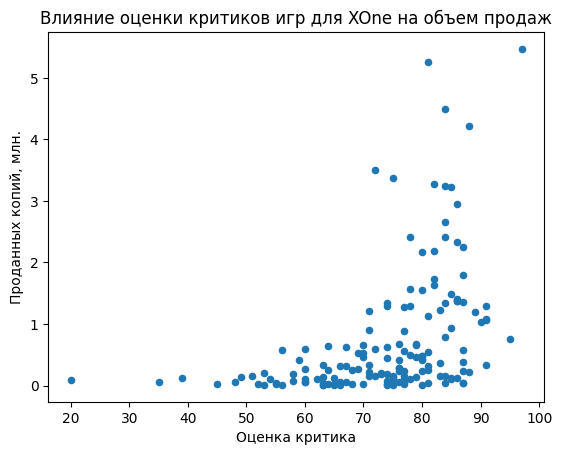

		 3DS


,user_score,critic_score,sum_sales
user_score,1.000000,0.862485,0.215193
critic_score,0.862485,1.000000,0.314117
sum_sales,0.215193,0.314117,1.000000


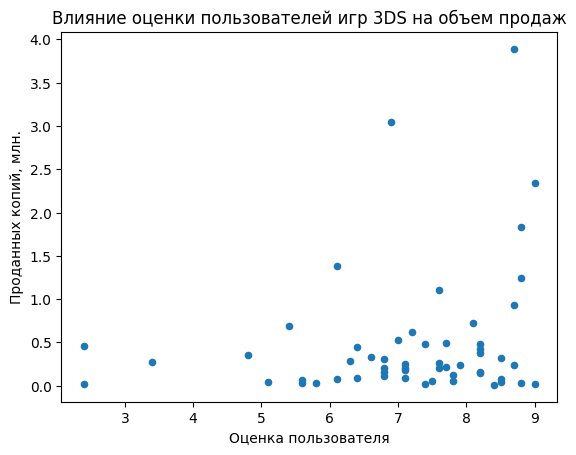

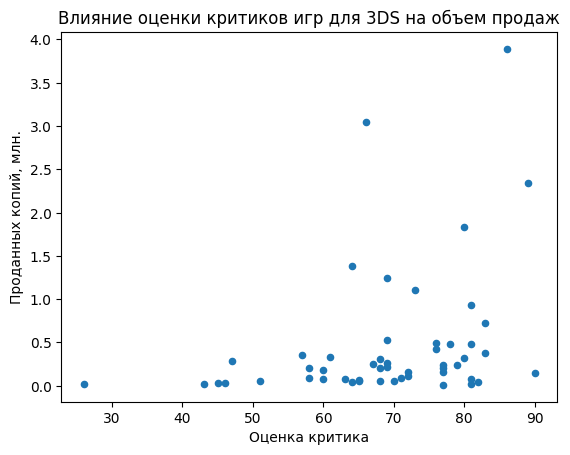

		 PS3


,user_score,critic_score,sum_sales
user_score,1.000000,0.693445,-0.166761
critic_score,0.693445,1.000000,0.446575
sum_sales,-0.166761,0.446575,1.000000


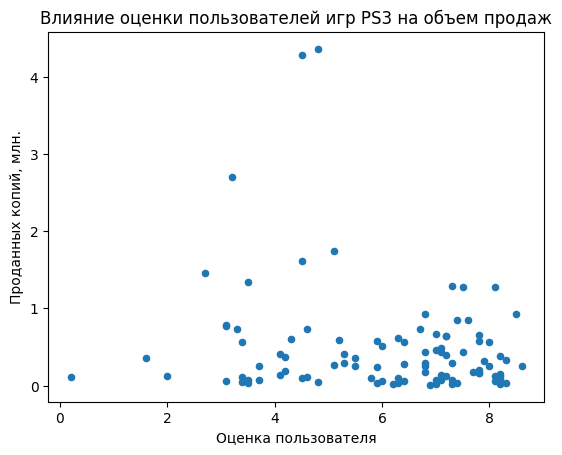

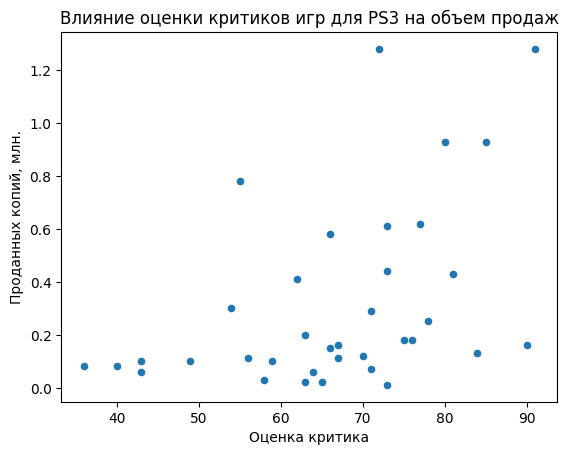

		 X360


,user_score,critic_score,sum_sales
user_score,1.000000,0.625309,-0.138445
critic_score,0.625309,1.000000,0.525723
sum_sales,-0.138445,0.525723,1.000000


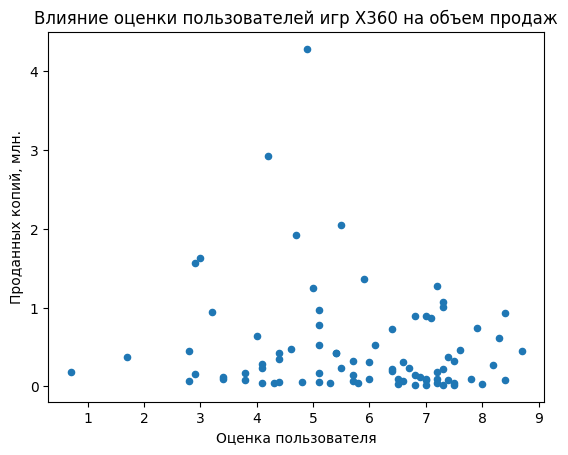

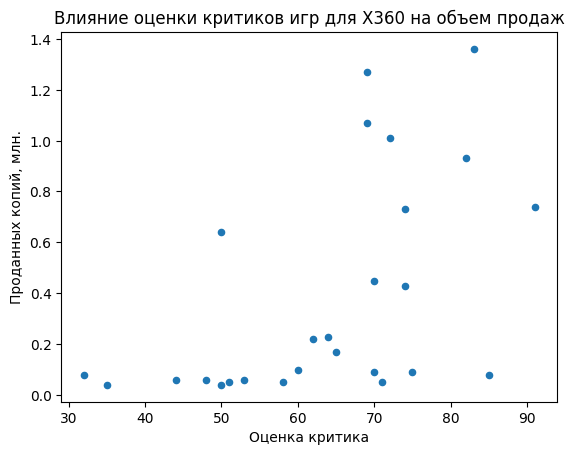

In [35]:
for platform in top_recent[:5]:
    print('\t\t', platform)
    display(recent.loc[recent['platform']==platform, ['user_score', 'critic_score', 'sum_sales']].corr())
    
    recent[recent['platform']==platform].plot.scatter(x='user_score', y='sum_sales')
    plt.xlabel('Оценка пользователя')
    plt.ylabel('Проданных копий, млн.')
    plt.title(f'Влияние оценки пользователей игр {platform} на объем продаж')
    plt.show()
    
    recent[recent['platform']==platform].plot.scatter(x='critic_score', y='sum_sales')
    plt.xlabel('Оценка критика')
    plt.ylabel('Проданных копий, млн.')
    plt.title(f'Влияние оценки критиков игр для {platform} на объем продаж')
    plt.show()

Для большинства платформ рейтинг от пользователей имеет большее влияние на объем продаж, чем пользовательский рейтинг. Всего для пары платформ - WiiU и 3DS, пользовательский рейтинг и рейтинг критиков имеют схожую корреляцию с продажами. 

#### 3.3  Анализ продаж по жанрам

Оценим общее распределение игр по жанрам. Выведем сводную таблицу с данными о количестве игр каждого жанра, суммарном объеме продаж по этим жанрам и среднему объему продаж для каждой игры (млн. копий):

In [36]:
recent.groupby('genre').agg({'sum_sales':['count','sum', 'mean']}).sort_values(by=('sum_sales','mean'), ascending=False)

sum_sales                  
                 count     sum      mean
genre                                   
Shooter            128  170.94  1.335469
Sports             161  109.48  0.680000
Platform            38   18.09  0.476053
Fighting            60   28.22  0.470333
Role-Playing       221  101.44  0.459005
Racing              69   27.52  0.398841
Misc               113   37.55  0.332301
Action             619  199.36  0.322068
Simulation          44   13.13  0.298409
Puzzle              14    2.21  0.157857
Strategy            37    3.96  0.107027
Adventure          185   17.55  0.094865

В среднем, с большим отрывом, наибольшее количество копий продается среди игр в жанре Shooter. По суммарным объемам продаж лидирует жанр Action, однако количество игр этого жанра также значительно больше остальных. Наиболее непопулярными жанрами являются жанры Puzzle и Strategy.

# 4. Портрет пользователя каждого региона

Определим особенности поведения пользователей в разных регионах. 

Представим данные о продажах игр для разных платформ по регионам в виде круговых диаграмм.

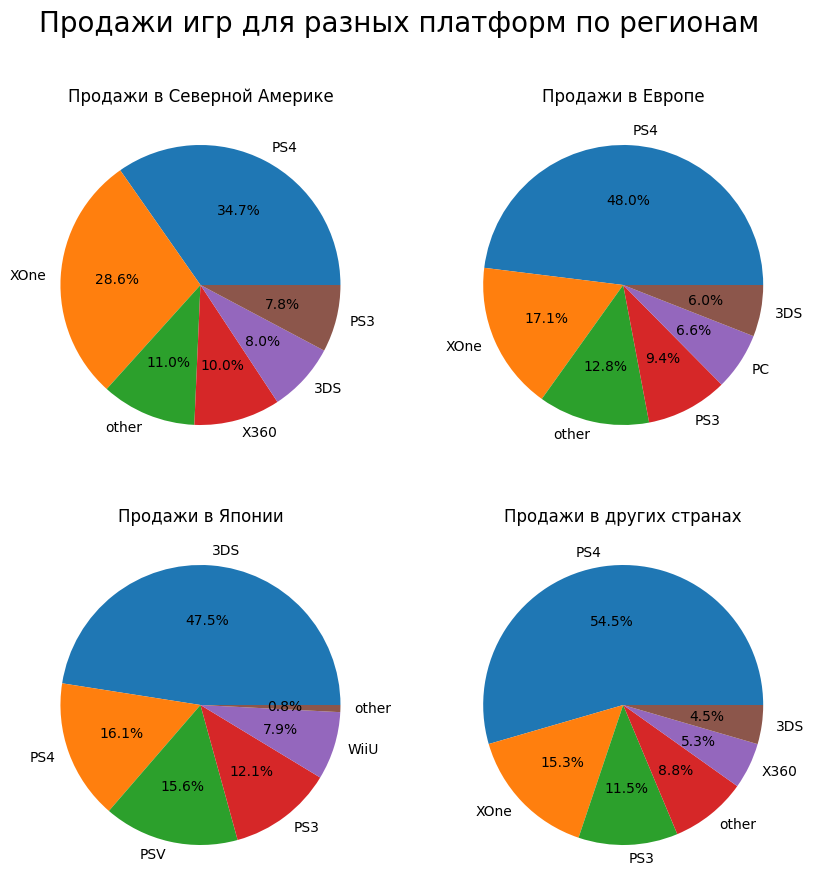

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

platforms = recent.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
platforms.loc['other']=platforms[5:].sum()
platforms.sort_values(ascending=False).iloc[:6].plot(ax=axs[0,0],kind='pie', autopct='%.1f%%')
axs[0,0].set(ylabel='', title='Продажи в Северной Америке')

platforms = recent.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
platforms.loc['other']=platforms[5:].sum()
platforms.sort_values(ascending=False).iloc[:6].plot(ax=axs[0,1], kind='pie', autopct='%.1f%%')
axs[0,1].set(ylabel='', title='Продажи в Европе')

platforms = recent.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
platforms.loc['other']=platforms[5:].sum()
platforms.sort_values(ascending=False).iloc[:6].plot(ax=axs[1,0], kind='pie', autopct='%.1f%%')
axs[1,0].set(ylabel='', title='Продажи в Японии')

platforms = recent.groupby('platform')['other_sales'].sum().sort_values(ascending=False)
platforms.loc['other']=platforms[5:].sum()
platforms.sort_values(ascending=False).iloc[:6].plot(ax=axs[1,1], kind='pie', autopct='%.1f%%')
axs[1,1].set(ylabel='', title='Продажи в других странах')

fig.suptitle('Продажи игр для разных платформ по регионам', size=20);

Во всех странах, кроме Японии, лидирует по продажам игр платформа PS4. При этом в Японии самая популярная платформа - 3DS, которая пользуется очень низким спросом в других странах. Платформа XOne сильно более популярна в Америке, так как производится именно там. 

Теперь посмотрим, как отличаются продажи в разных регионах в разрезе жанров:

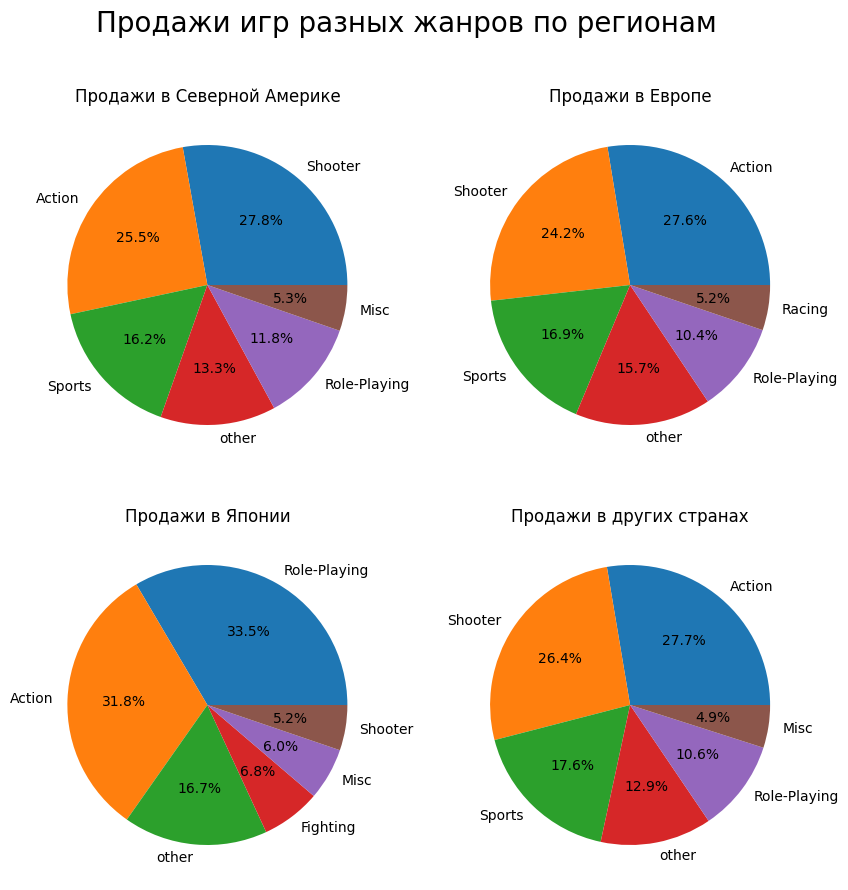

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

platforms = recent.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
platforms.loc['other']=platforms[5:].sum()
platforms.sort_values(ascending=False).iloc[:6].plot(ax=axs[0,0],kind='pie', autopct='%.1f%%')
axs[0,0].set(ylabel='', title='Продажи в Северной Америке')

platforms = recent.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
platforms.loc['other']=platforms[5:].sum()
platforms.sort_values(ascending=False).iloc[:6].plot(ax=axs[0,1], kind='pie', autopct='%.1f%%')
axs[0,1].set(ylabel='', title='Продажи в Европе')

platforms = recent.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
platforms.loc['other']=platforms[5:].sum()
platforms.sort_values(ascending=False).iloc[:6].plot(ax=axs[1,0], kind='pie', autopct='%.1f%%')
axs[1,0].set(ylabel='', title='Продажи в Японии')

platforms = recent.groupby('genre')['other_sales'].sum().sort_values(ascending=False)
platforms.loc['other']=platforms[5:].sum()
platforms.sort_values(ascending=False).iloc[:6].plot(ax=axs[1,1], kind='pie', autopct='%.1f%%')
axs[1,1].set(ylabel='', title='Продажи в других странах')

fig.suptitle('Продажи игр разных жанров по регионам', size=20);

Для всех стран популярным жанром является "Action". Для всех стран, кроме Японии, много продаж имеют игры жанра "Shooter" и "Sports". Для Японии самый продаваемый жанр - "Role-Playing", хотя для других регионов он менее популярный(12%-13% продаж). 

Теперь изучим продажи в регионах в зависимости от возрастного рейтинга. 

In [39]:
recent.groupby('rating')[['sum_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean().sort_values(by='sum_sales')

,sum_sales,na_sales,eu_sales,jp_sales,other_sales
rating,,,,,
no rating,0.265648,0.086409,0.078705,0.075968,0.024566
T,0.365793,0.143727,0.125720,0.054539,0.041808
E10+,0.387459,0.179622,0.141405,0.024108,0.042324
E,0.607900,0.231689,0.265114,0.040822,0.070274
M,0.854868,0.363849,0.352604,0.030226,0.108189


Во всех странах, кроме Японии наиболее продаваемыми являются игры категории M и E. В Японии лидирут игры без рейтинга ESRB - то есть в этом регионе наиболее популярными являются игры, которые не распространены широко в Северной Америке. 

# 5. Проверка гипотез

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC отличаются и это отличие статистически значимо. Нулевая гипотеза: средние пользовательские рейтинги игр на платформах Xbox One и PC равны. Альтернативная гипотеза: средние рейтинги игр на этих платформах не равны. 

Для проверки используем ttest для двух независимых выборок. 

In [40]:
alpha = 0.05 # зададим порог статистической значимости

In [41]:
result_1 = st.ttest_ind(recent.loc[recent['platform']=='XOne', 'user_score'].dropna(),
                        recent.loc[recent['platform']=='PC', 'user_score'].dropna())
result_1

TtestResult(statistic=1.6285882029651313, pvalue=0.10450507919348416, df=285.0)

In [42]:
(recent.loc[recent['platform']=='XOne', 'user_score'].dropna().mean(),
 recent.loc[recent['platform']=='PC', 'user_score'].dropna().mean())

(6.594545454545456, 6.298360655737705)

In [43]:
result_1.pvalue

0.10450507919348416

In [44]:
result_1.pvalue<alpha

False

Нулевая гипотеза не отвергается. Значит различие в средних пользовательских рейтингах не статистически значимое.

Теперь проверим, что различия пользовательских рейтингов игр жанров Action и Sports не статистически значимые. Нулевая гипотеза: средние пользовательские рейтинги игр жанров Action и Sport равны. Альтернативная гипотеза: средние рейтинги игр жанров Action и Sport не равны. 

Для проверки используем ttest для двух независимых выборок. 

In [45]:
result_2 = st.ttest_ind(recent.loc[recent['genre']=='Action', 'user_score'].dropna(),
                        recent.loc[recent['genre']=='Sports', 'user_score'].dropna())
result_2

TtestResult(statistic=9.425173048948047, pvalue=2.871114798510586e-19, df=422.0)

In [46]:
(recent.loc[recent['genre']=='Action', 'user_score'].dropna().mean(), 
 recent.loc[recent['genre']=='Sports', 'user_score'].dropna().mean())

(6.760606060606061, 5.2251968503937)

In [47]:
result_2.pvalue

2.871114798510586e-19

In [48]:
result_2.pvalue<alpha

True

Нулевая гипотеза опровергнута. Различие средних пользовательских рейтингов игр жанров Action и Sports статистически значимое.

**Таким образом**, в данном разделе мы сравнивали оценки пользователей по разным группам игр. Соответственно нам нужно было понять, присутствуют ли статистически значимые различия по оценкам между жанрами и платформами (нулевая гипотеза - их нет). Так как для отвержения гипотезы нас удовлетворяли различия как в одну, так и в другую стороны, при этом выборки у нас независимые, мы использовали двусторонний ttest для двух независимых выборок. 

# 6. Итоговый вывод

В процессе предобработки исходных данных были выполнены следующие процедуры:
- названия столбцов приведены к хорошему стилю (к нижнему регистру);
- проведена проверка датафрейма на наличие пропущенных значений и дубликатов;
- в столбцах с годом выпуска игры и с пользовательским рейтингом изменен тип данных;
- добавлен столбец с суммарными продажами игр в разных регионах, необходимый для дальнейшего анализа.

Обнаруженные дубликаты были удалены. Все пропущенные значения, кроме пропусков в столбце с рейтингом ESRB, было решено оставить без изменения. 

Анализ средней продолжительность "жизни" игровых платформ, показал, что для изучения трендов оптимально использовать данные за последние 3-4 года.

Проанализировав данные за 2014-2016 годы, мы выявили, что за последние годы росли продажи игр для платформ PS4 и XOne. Кроме того, игры для этих платформ были самыми продаваемыми в этот период.

Мы нашли положительную корреляцию между оценками критиков и объемом продаж. Корреляция между оценками пользователей и объемом продаж была около нулевой для большинства платформ. 

В среднем игры в жанре Shooter продавались в наибольшем количестве копий. Однако самым популярным жанром по общим продажам был Action.

Во всех странах, кроме Японии, лидирует по продажам игр платформа PS4. При этом в Японии самая популярная платформа - 3DS, которая пользуется очень низким спросом в других странах. 

Для всех стран популярным жанром является "Action". Для всех стран, кроме Японии много продаж имеют игры жанра "Shooter" и "Sports". Для Японии самый продаваемый жанр - "Role-Playing", хотя для других регионов он менее популярный. 

Во всех странах, кроме Японии более продаваемыми являются игры категории M и E. В Японии лидирут игры категории T.

Анализ оценок пользователей игр для платформ Xbox One и PC не выявил статистически значимых отличий. Однако различия между средними оценками пользователей игр жанров Action и Sports  были статистически значимы. 

**Мы нашли крупные различия между рынками компьютерных игр в Японии и в других регионах, поэтому подход к выбору игр для продажи, а также подход к рекламе, для этих регионов должен быть разным. Вне Японии, для увеличения объема продаж в будущем году, рекомендуется увеличить количество игр в жанре Shooter для платформ PS4 и XOne. В Японии имеют почти нулевые продажи игры для плафторм неяпонского производства. Поэтому для Японии мы рекомендуем сфокусироваться на продажах игр компаний Sony и Nintendo, отдавая предпочтение играм жанров Action и Role-playing. Также мы советуем принимать во внимание рейтинги критиков и продавать игры, имеющие наиболее высокие оценки.**